## N차 과제 - API Scrapping_Reddit

- 주제: API를 활용한 데이터 불러오기 및 분석
- 데이터: 커뮤니티 텍스트 데이터(API 활용)
- 사용 라이브러리: praw, wordcloud, seaborn, nltk

### 1. 라이브러리 및 API 설정

1.1 미국 최대 커뮤니티 중 하나인 레딧(Reddit)에서 데이터를 불러오기 위해 praw 라이브러리를 install 해야 합니다.

In [1]:
#!pip install praw

1.2 라이브러리 설정

In [2]:
import praw
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

1.3 자연어처리를 위해 사용할 nltk 패키지를 다운로드하겠습니다(NLP 과제가 아니므로 자세히 살펴보지는 않겠습니다).

궁금하신 분들을 위해!
https://datascienceschool.net/03%20machine%20learning/03.01.01%20NLTK%20%EC%9E%90%EC%97%B0%EC%96%B4%20%EC%B2%98%EB%A6%AC%20%ED%8C%A8%ED%82%A4%EC%A7%80.html

In [3]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/rynn/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/rynn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

1.4 API 인증을 받겠습니다. 절차의 경우 추가로 첨부한 자료를 참고해주세요.
### **과제를 제출할 때는 본 항목의 API 키들은 모두 지우고 제출해주세요! 공유되면 안 됩니다.**

In [4]:
#Reddit API 인증
reddit = praw.Reddit(
    client_id='',
    client_secret='',
    user_agent=''
)

### 2. 데이터 수집 및 분석

2.1 본격적으로 API를 활용해 데이터를 불러오겠습니다. 먼저 subreddit을 'stocks'로 설정하고 엔비디아 주식에 대한 게시글을 가져오겠습니다.

In [5]:
subreddit_name = 'stocks'
search_query = 'NVIDIA OR NVDA'
subreddit = reddit.subreddit(subreddit_name)
top_posts = subreddit.search(search_query, limit=300, sort='top')

2.2 가져온 데이터를 제목과 내용으로 분리된 데이터프레임으로 변환하세요.

In [6]:
data = []
for post in top_posts:
    data.append({'Title': post.title, 'Text': post.selftext})

df = pd.DataFrame(data)

In [7]:
df

,Title,Text
0,A note to young investors (or new investors),As the Fed caused a bit of a ripple in the mar...
1,To all of you who are red this year while the ...,Lately I keep hearing the same old narrative f...
2,Pelosi's husband buying over $1 million of com...,[Full Article](https://www.msn.com/en-us/tv/ne...
3,Beware of what AMC shorts are holding!,I understand that most people in this thread i...
4,Blackberry -- A Dormant Giant,###**Abbreviation Index:**\n\nBB -- Blackberry...
...,...,...
230,"Here is a Market Recap for today Thursday, Nov...","**PsychoMarket Recap - Thursday, November 18, ..."
231,TSMC sales grow 45% in July on strong AI chip ...,(Bloomberg) -- Taiwan Semiconductor Manufactur...
232,"META Still The Cheapest of The Magnificent 7, ...",Quick glance at some of the numbers for META. ...
233,Made 30% since I started trading 7 months ago ...,"Hello folks, \n\nI am a 24 year old who starte..."


2.3 가져온 데이터를 토큰화, 불용어 제거 등 분석에 활용하기 위한 전처리를 진행하세요.

In [8]:
import string
import re

In [9]:
# 불용어 리스트
stop_words = set(stopwords.words('english'))

# 전처리 함수
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation)) # 모든 구두점 문자 제거 
    text = re.sub(r"[“”‘’]", '', text) # 따옴표 모양이 다르게 생겨서 직접 제거
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

In [10]:
# 새로운 변수에 저장
df['cleaned_Title'] = df['Title'].apply(preprocess_text)
df['cleaned_Text'] = df['Text'].apply(preprocess_text)

In [11]:
df

,Title,Text,cleaned_Title,cleaned_Text
0,A note to young investors (or new investors),As the Fed caused a bit of a ripple in the mar...,"[note, young, investors, new, investors]","[fed, caused, bit, ripple, market, today, cons..."
1,To all of you who are red this year while the ...,Lately I keep hearing the same old narrative f...,"[red, year, sp500, 30]","[lately, keep, hearing, old, narrative, beatdo..."
2,Pelosi's husband buying over $1 million of com...,[Full Article](https://www.msn.com/en-us/tv/ne...,"[pelosis, husband, buying, 1, million, compute...","[full, articlehttpswwwmsncomenustvnewscnnmsnbc..."
3,Beware of what AMC shorts are holding!,I understand that most people in this thread i...,"[beware, amc, shorts, holding]","[understand, people, thread, invest, safely, a..."
4,Blackberry -- A Dormant Giant,###**Abbreviation Index:**\n\nBB -- Blackberry...,"[blackberry, dormant, giant]","[abbreviation, index, bb, blackberry, aws, ama..."
...,...,...,...,...
230,"Here is a Market Recap for today Thursday, Nov...","**PsychoMarket Recap - Thursday, November 18, ...","[market, recap, today, thursday, november, 18,...","[psychomarket, recap, thursday, november, 18, ..."
231,TSMC sales grow 45% in July on strong AI chip ...,(Bloomberg) -- Taiwan Semiconductor Manufactur...,"[tsmc, sales, grow, 45, july, strong, ai, chip...","[bloomberg, taiwan, semiconductor, manufacturi..."
232,"META Still The Cheapest of The Magnificent 7, ...",Quick glance at some of the numbers for META. ...,"[meta, still, cheapest, magnificent, 7, wrong]","[quick, glance, numbers, meta, eps, crazy, goo..."
233,Made 30% since I started trading 7 months ago ...,"Hello folks, \n\nI am a 24 year old who starte...","[made, 30, since, started, trading, 7, months,...","[hello, folks, 24, year, old, started, working..."


2.4 전처리된 데이터를 활용해 어떤 단어가 가장 많이 나왔는지 WordCloud를 통해 확인하세요.

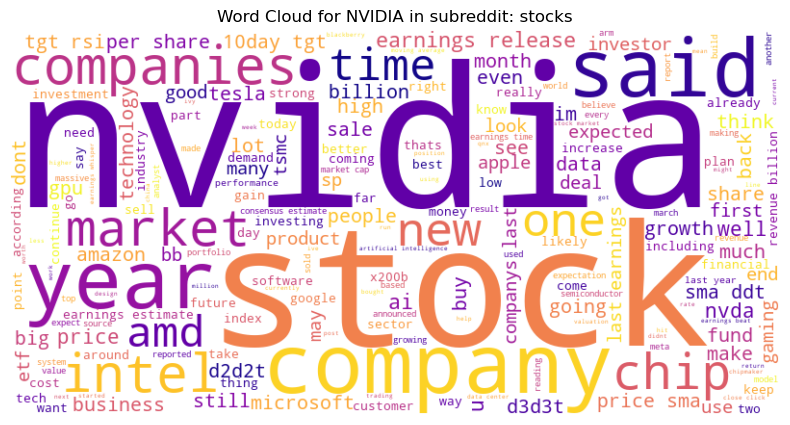

In [15]:
# 단어를 하나의 문자열로 결합
title_n_text = [' '.join(words) for words in df['cleaned_Title'] + df['cleaned_Text']]
all_words = ' '.join(title_n_text)

# 워드 클라우드
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for NVIDIA in subreddit: stocks')
plt.axis('off') # 축 안보이게
plt.show()

2.6 가장 많이 나온 단어에는 어떤 것들이 있는지 barplot을 그려 확인하세요.

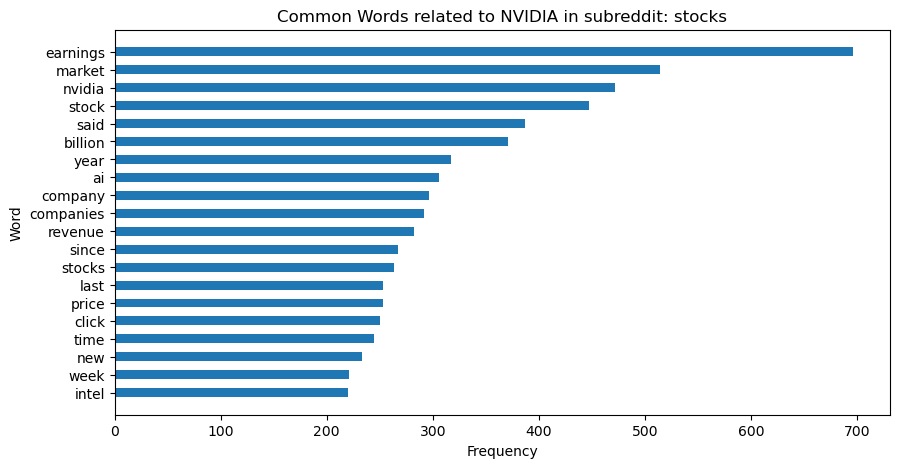

In [16]:
# 빈도수 기준 상위 20개 단어 추출
most_common_words = Counter(all_words.split()).most_common(20)

# 단어와 빈도를 분리
words, counts = zip(*most_common_words)

# barplot
plt.figure(figsize=(10, 5))
plt.barh(words, counts, height=0.5)
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Common Words related to NVIDIA in subreddit: stocks')
plt.gca().invert_yaxis() # y축 반전 (빈도수 높은게 위로 오도록)
plt.show()

# **제출 시 API 인증 부분의 id, secret은 모두 지우고 제출해주세요!**

### 3. 자유 분석

위에서 진행한 분석만으로는 유의미한 인사이트를 도출하기는 어렵습니다. 추가적인 분석을 통해 해당 주식에 대한 평가가 긍정적인지, 또는 어떠한 이슈가 있는지 확인하는 것과 같은 추가적인 분석을 진행해주세요. 게시글이 아닌 리뷰를 가져오는 것도 가능합니다.

또한 본 분석에서 사용한 데이터가 아닌 다른 데이터를 활용하거나 또 다른 커뮤니티 혹은 사이트에서 API를 받아와 새로운 주제를 가지고 분석하는 것도 좋습니다:)

- LDA
<br>토픽 모델링은 문서의 집합에서 토픽을 찾아내는 프로세스를 말합니다. 이는 검색 엔진, 고객 민원 시스템 등과 같이 문서의 주제를 알아내는 일이 중요한 곳에서 사용됩니다. 잠재 디리클레 할당(Latent Dirichlet Allocation, LDA)은 토픽 모델링의 대표적인 알고리즘입니다. 줄여서 LDA라고 합니다.

In [32]:
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim

In [33]:
text_data = df['cleaned_Text']

In [34]:
# 딕셔너리 생성
dictionary = corpora.Dictionary(text_data)

# 코퍼스 생성 (단어의 빈도수로 표현)
corpus = [dictionary.doc2bow(text) for text in text_data]

In [35]:
# LDA 모델 훈련
num_topics = 5  # 원하는 주제 수
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

In [36]:
# 각 주제의 단어 출력
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")

Topic 0: 0.006*"top" + 0.006*"us" + 0.006*"global" + 0.006*"stock" + 0.005*"stocks" + 0.005*"ideas" + 0.003*"anthropic" + 0.003*"rated" + 0.003*"amazon" + 0.002*"first"
Topic 1: 0.005*"companies" + 0.004*"market" + 0.004*"funds" + 0.003*"need" + 0.003*"one" + 0.003*"fund" + 0.003*"dd" + 0.003*"target" + 0.003*"energy" + 0.003*"us"
Topic 2: 0.012*"nvidia" + 0.011*"billion" + 0.010*"said" + 0.009*"ai" + 0.007*"market" + 0.007*"year" + 0.007*"company" + 0.006*"revenue" + 0.006*"stock" + 0.005*"chips"
Topic 3: 0.025*"earnings" + 0.011*"click" + 0.007*"release" + 0.007*"since" + 0.007*"market" + 0.006*"last" + 0.006*"price" + 0.006*"companys" + 0.006*"stock" + 0.005*"week"
Topic 4: 0.006*"market" + 0.006*"like" + 0.006*"stock" + 0.005*"companies" + 0.005*"years" + 0.004*"company" + 0.004*"time" + 0.004*"amd" + 0.004*"dont" + 0.004*"nvda"


##### Topic 분석
- Topic 0
<br>주요 단어: "top", "us", "global", "stock", "stocks", "ideas", "anthropic", "rated", "amazon", "first"
<br>분석: 이 주제는 주식 시장과 관련된 내용으로 보이며, 특히 미국과 글로벌 시장의 주식에 대한 아이디어나 평가를 언급하고 있습니다. "amazon"이라는 단어가 포함되어 있어, 이 주제가 기술 주식이나 대형 기업의 성과에 대한 논의일 가능성이 있습니다.
- Topic 1
<br>주요 단어: "companies", "market", "funds", "need", "one", "fund", "dd", "target", "energy", "us"
<br>분석: 이 주제는 투자 및 금융 관련 내용으로 보입니다. 특히 펀드와 관련된 기업, 시장에 대한 필요성 및 목표를 다루고 있는 것 같습니다. "energy"라는 단어가 포함되어 있어, 에너지 산업에 대한 투자 논의가 포함될 수 있습니다.
- Topic 2
<br>주요 단어: "nvidia", "billion", "said", "ai", "market", "year", "company", "revenue", "stock", "chips"
<br>분석: 이 주제는 NVIDIA와 관련된 내용으로, AI 기술과 관련된 시장의 성장, 매출, 주식 성과 등을 다루고 있습니다. "billion"과 "revenue"라는 단어가 포함되어 있어, NVIDIA의 재무 성과에 대한 분석이 포함될 가능성이 큽니다.
- Topic 3
<br>주요 단어: "earnings", "click", "release", "since", "market", "last", "price", "companys", "stock", "week"
<br>분석: 이 주제는 기업의 실적 발표와 관련된 내용으로 보입니다. "earnings"와 "release"라는 단어가 포함되어 있어, 주식 시장에서의 실적 발표와 관련된 뉴스나 분석을 다루고 있을 가능성이 높습니다.
- Topic 4
<br>주요 단어: "market", "like", "stock", "companies", "years", "company", "time", "amd", "dont", "nvda"
<br>분석: 이 주제는 주식 시장과 기업에 대한 전반적인 논의로 보입니다. "amd"와 "nvda"는 각각 AMD와 NVIDIA를 나타내며, 이 두 회사의 주식이나 시장 상황에 대한 비교 및 분석이 포함될 수 있습니다.

In [37]:
pyLDAvis.enable_notebook()

In [42]:
# LDA 시각화
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given

시각화는 오류나서 포기..